In [1]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("dell-research-harvard/historical_newspaper_ner")
model = AutoModelForTokenClassification.from_pretrained("dell-research-harvard/historical_newspaper_ner")

/Users/owenmonroe/anaconda3/envs/textminingvis/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config = model.config
labels = config.id2label
print(labels)

{0: 'B-LOC', 1: 'B-MISC', 2: 'B-ORG', 3: 'B-PER', 4: 'I-LOC', 5: 'I-MISC', 6: 'I-ORG', 7: 'I-PER', 8: 'O'}


In [3]:
with open("Useful_Knowledge_Texts/Clipped_Texts/Chambers_InfoForPeople_France_1835.txt", "r", encoding="utf-8") as text_file:
    text = text_file.read()

In [4]:
subset_text = text[:512]

In [5]:

import torch

tokenizer = AutoTokenizer.from_pretrained("dell-research-harvard/historical_newspaper_ner")
model = AutoModelForTokenClassification.from_pretrained("dell-research-harvard/historical_newspaper_ner")

inputs = tokenizer(
    "HuggingFace is a company based in Paris and New York", add_special_tokens=False, return_tensors="pt"
)

with torch.no_grad():
    logits = model(**inputs).logits

predicted_token_class_ids = logits.argmax(-1)

# Note that tokens are classified rather then input words which means that
# there might be more predicted token classes than words.
# Multiple token classes might account for the same word
predicted_tokens_classes = [model.config.id2label[t.item()] for t in predicted_token_class_ids[0]]
predicted_tokens_classes
# ['O', 'ORG', 'ORG', 'O', 'O', 'O', 'O', 'O', 'LOC', 'O', 'LOC', 'LOC']

labels = predicted_token_class_ids
# loss = model(**inputs, labels=labels).loss
# round(loss.item(), 2)
# 0.01

In [6]:
predicted_tokens_classes

['O', 'O', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'B-LOC', 'I-LOC']

In [7]:
predicted_token_class_ids

tensor([[8, 8, 5, 8, 8, 8, 8, 8, 0, 8, 0, 4]])

In [8]:
import torch

tokenizer = AutoTokenizer.from_pretrained("dell-research-harvard/historical_newspaper_ner")
model = AutoModelForTokenClassification.from_pretrained("dell-research-harvard/historical_newspaper_ner")

inputs = tokenizer(
    subset_text, add_special_tokens=False, return_tensors="pt"
)

with torch.no_grad():
    logits = model(**inputs).logits

predicted_token_class_ids = logits.argmax(-1)

# Note that tokens are classified rather then input words which means that
# there might be more predicted token classes than words.
# Multiple token classes might account for the same word
predicted_tokens_classes = [model.config.id2label[t.item()] for t in predicted_token_class_ids[0]]

# ['O', 'ORG', 'ORG', 'O', 'O', 'O', 'O', 'O', 'LOC', 'O', 'LOC', 'LOC']

labels = predicted_token_class_ids
# loss = model(**inputs, labels=labels).loss
# round(loss.item(), 2)
# 0.01

In [9]:
predicted_tokens_classes

['O',
 'O',
 'O',
 'O',
 'B-LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-LOC',
 'B-LOC',
 'I-LOC',
 'I-LOC',
 'I-LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-MISC',
 'I-LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-MISC',
 'O',
 'O',
 'B-LOC',
 'I-LOC',
 'I-LOC',
 'I-LOC',
 'I-LOC',
 'I-LOC',
 'O',
 'B-LOC',
 'I-LOC',
 'I-LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-LOC',
 'I-LOC',
 'I-LOC',
 'I-LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-LOC',
 'I-LOC',
 'I-LOC',
 'I-

In [28]:
clean_pred_list = []

for tag in predicted_tokens_classes:

    if tag.startswith('B-'):
        tag = tag[2:]  # Remove "B-"
    elif tag.startswith('I-'):
        tag = tag[2:]  # Remove "I-"
    clean_pred_list.append(tag)


In [37]:
print(len(clean_pred_list))
clean_pred_list

160


['O',
 'O',
 'O',
 'O',
 'LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'LOC',
 'LOC',
 'LOC',
 'LOC',
 'LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'MISC',
 'LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'MISC',
 'O',
 'O',
 'LOC',
 'LOC',
 'LOC',
 'LOC',
 'LOC',
 'LOC',
 'O',
 'LOC',
 'LOC',
 'LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'LOC',
 'LOC',
 'LOC',
 'LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'LOC',
 'LOC',
 'LOC',
 'LOC',
 'O',
 'O',
 'LOC',
 'LOC',
 'LOC',
 'LOC',
 '

In [39]:

cleaner_pred_list = ['O' if tag == 'MISC' else tag for tag in clean_pred_list]

In [40]:
print(len(cleaner_pred_list))
cleaner_pred_list

160


['O',
 'O',
 'O',
 'O',
 'LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'LOC',
 'LOC',
 'LOC',
 'LOC',
 'LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'LOC',
 'LOC',
 'LOC',
 'LOC',
 'LOC',
 'LOC',
 'O',
 'LOC',
 'LOC',
 'LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'LOC',
 'LOC',
 'LOC',
 'LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'LOC',
 'LOC',
 'LOC',
 'LOC',
 'O',
 'O',
 'LOC',
 'LOC',
 'LOC',
 'LOC',
 'LOC',


In [41]:
text_list = subset_text.split()

In [42]:
text_list

['he',
 'principal',
 'mountains',
 'of',
 'France',
 'are,',
 '1.',
 'The',
 'Toeget',
 'on',
 'the',
 'north-east.',
 'They',
 'are',
 'of',
 'a',
 'rounded',
 'oat-',
 'Bne,',
 'with',
 'gentle',
 'slopes,',
 'and',
 'afford',
 'much',
 'open',
 'paa-',
 'turage.',
 'The',
 'highest',
 'summit',
 'is',
 'not',
 'more',
 'than',
 '4500',
 'ftet',
 'nigh.',
 '2.',
 'The',
 'Jura',
 'mountains',
 'He',
 'to',
 'the',
 'south',
 'of',
 'these,',
 'and',
 'their',
 'summiu',
 'rise',
 'to',
 'the',
 'height',
 'of',
 '0000',
 'feet.',
 '3.',
 'Many',
 'Alpine',
 'branches',
 'intersect',
 'Daaphlny',
 'and',
 'Provence.',
 'In',
 'the',
 'ceotre',
 'of',
 'the',
 'kingdom',
 'are,',
 '4.',
 'The',
 'mountains',
 'of',
 'Auvergne,',
 'of',
 'volcamo',
 'origin,',
 'of',
 'which',
 'the',
 'Puy',
 'de',
 'Dome,',
 'the',
 'Moots',
 "d'Or,",
 'and',
 't']

In [45]:
ner_pred = list(zip(text_list, cleaner_pred_list))

In [46]:
ner_pred

[('he', 'O'),
 ('principal', 'O'),
 ('mountains', 'O'),
 ('of', 'O'),
 ('France', 'LOC'),
 ('are,', 'O'),
 ('1.', 'O'),
 ('The', 'O'),
 ('Toeget', 'O'),
 ('on', 'O'),
 ('the', 'LOC'),
 ('north-east.', 'LOC'),
 ('They', 'LOC'),
 ('are', 'LOC'),
 ('of', 'LOC'),
 ('a', 'O'),
 ('rounded', 'O'),
 ('oat-', 'O'),
 ('Bne,', 'O'),
 ('with', 'O'),
 ('gentle', 'O'),
 ('slopes,', 'O'),
 ('and', 'O'),
 ('afford', 'O'),
 ('much', 'O'),
 ('open', 'O'),
 ('paa-', 'O'),
 ('turage.', 'O'),
 ('The', 'O'),
 ('highest', 'O'),
 ('summit', 'O'),
 ('is', 'O'),
 ('not', 'O'),
 ('more', 'O'),
 ('than', 'O'),
 ('4500', 'O'),
 ('ftet', 'O'),
 ('nigh.', 'O'),
 ('2.', 'O'),
 ('The', 'O'),
 ('Jura', 'O'),
 ('mountains', 'O'),
 ('He', 'O'),
 ('to', 'O'),
 ('the', 'O'),
 ('south', 'O'),
 ('of', 'O'),
 ('these,', 'O'),
 ('and', 'O'),
 ('their', 'O'),
 ('summiu', 'O'),
 ('rise', 'O'),
 ('to', 'O'),
 ('the', 'O'),
 ('height', 'O'),
 ('of', 'O'),
 ('0000', 'O'),
 ('feet.', 'O'),
 ('3.', 'O'),
 ('Many', 'O'),
 ('Alpine', '

In [47]:
tags_to_preserve = ['ORG', 'LOC', 'PER']
filtered_ner = [(token, tag) for token, tag in ner_pred if tag in tags_to_preserve]

In [48]:
filtered_ner

[('France', 'LOC'),
 ('the', 'LOC'),
 ('north-east.', 'LOC'),
 ('They', 'LOC'),
 ('are', 'LOC'),
 ('of', 'LOC'),
 ('the', 'LOC')]

In [50]:
hand_annotated_data = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/Chambers_InfoForPeople_France_1835.txt.tsv", "r", encoding="utf-8") as iob_file:
    for line in iob_file:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data.append((token, label))




In [56]:
hand_subset = hand_annotated_data[:512]

In [57]:
hand_subset

[('he', 'O'),
 ('principal', 'O'),
 ('mountains', 'O'),
 ('of', 'O'),
 ('France', 'B-GPE'),
 ('are', 'O'),
 (',', 'O'),
 ('1', 'B-CARDINAL'),
 ('.', 'O'),
 ('The', 'O'),
 ('Toeget', 'O'),
 ('on', 'O'),
 ('the', 'O'),
 ('north', 'O'),
 ('-', 'O'),
 ('east', 'O'),
 ('.', 'O'),
 ('They', 'O'),
 ('are', 'O'),
 ('of', 'O'),
 ('a', 'O'),
 ('rounded', 'O'),
 ('oat', 'O'),
 ('-', 'O'),
 ('Bne', 'O'),
 (',', 'O'),
 ('with', 'O'),
 ('gentle', 'O'),
 ('slopes', 'O'),
 (',', 'O'),
 ('and', 'O'),
 ('afford', 'O'),
 ('much', 'O'),
 ('open', 'O'),
 ('paa', 'O'),
 ('-', 'O'),
 ('turage', 'O'),
 ('.', 'O'),
 ('The', 'O'),
 ('highest', 'O'),
 ('summit', 'O'),
 ('is', 'O'),
 ('not', 'O'),
 ('more', 'O'),
 ('than', 'O'),
 ('4500', 'B-QUANTITY'),
 ('ftet', 'O'),
 ('nigh', 'O'),
 ('.', 'O'),
 ('2', 'O'),
 ('.', 'O'),
 ('The', 'O'),
 ('Jura', 'B-LOC'),
 ('mountains', 'I-LOC'),
 ('He', 'O'),
 ('to', 'O'),
 ('the', 'O'),
 ('south', 'O'),
 ('of', 'O'),
 ('these', 'O'),
 (',', 'O'),
 ('and', 'O'),
 ('their', 'O'

In [58]:
hand_annotated_tagged = [(token, label) for token, label in hand_subset if label != 'O']

for i in range(len(hand_annotated_tagged)):
    token, label = hand_annotated_tagged[i]
    if label.startswith('B-'):
        label = label[2:]  # Remove "B-"
    elif label.startswith('I-'):
        label = label[2:]  # Remove "I-"
    hand_annotated_tagged[i] = (token, label)
    hand_annotated_clean = hand_annotated_tagged

In [59]:
hand_annotated_clean

[('France', 'GPE'),
 ('1', 'CARDINAL'),
 ('4500', 'QUANTITY'),
 ('Jura', 'LOC'),
 ('mountains', 'LOC'),
 ('0000', 'QUANTITY'),
 ('Daaphlny', 'GPE'),
 ('Provence', 'GPE'),
 ('mountains', 'LOC'),
 ('of', 'LOC'),
 ('Auvergne', 'LOC'),
 ('Puy', 'LOC'),
 ('de', 'LOC'),
 ('Dome', 'LOC'),
 ('Moots', 'LOC'),
 ("d'Or", 'LOC'),
 ('Mont', 'LOC'),
 ('Lozcre', 'LOC'),
 ('510', 'QUANTITY'),
 ('Pyrenees', 'LOC'),
 ('France', 'GPE'),
 ('Spain', 'GPE'),
 ('Rhine', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Garonne', 'LOC'),
 ('Adour', 'LOC'),
 ('Pyrenees', 'LOC'),
 ('Bayonne', 'LOC'),
 ('Marne', 'LOC'),
 ('Oise', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Sarthe', 'LOC'),
 ('Maycnne', 'LOC'),
 ('Loire', 'LOC'),
 ('Rhone', 'LOC'),
 ('Saoue', 'LOC'),
 ('Isire', 'LOC'),
 ('Durance', 'LOC'),
 ('Ain', 'LOC'),
 ('Sorgue', 'LOC'),
 ('Tarn', 'LOC'),
 ('Dordi', 'LOC'),
 ('Garonne', 'LOC'),
 ('canals', 'FAC'),
 ('France', 'GPE'),
 ('Flanders', 'GPE'),
 ('Artuis', 'GPE'),
 ('Picardy', 'GPE'),
 ('Norma

In [65]:
tag_mapping = {'GPE': 'LOC'}

hand_annotations_clean = [(token, tag_mapping.get(tag, tag)) for token, tag in hand_annotated_clean]
hand_annotations_clean

[('France', 'LOC'),
 ('1', 'CARDINAL'),
 ('4500', 'QUANTITY'),
 ('Jura', 'LOC'),
 ('mountains', 'LOC'),
 ('0000', 'QUANTITY'),
 ('Daaphlny', 'LOC'),
 ('Provence', 'LOC'),
 ('mountains', 'LOC'),
 ('of', 'LOC'),
 ('Auvergne', 'LOC'),
 ('Puy', 'LOC'),
 ('de', 'LOC'),
 ('Dome', 'LOC'),
 ('Moots', 'LOC'),
 ("d'Or", 'LOC'),
 ('Mont', 'LOC'),
 ('Lozcre', 'LOC'),
 ('510', 'QUANTITY'),
 ('Pyrenees', 'LOC'),
 ('France', 'LOC'),
 ('Spain', 'LOC'),
 ('Rhine', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Garonne', 'LOC'),
 ('Adour', 'LOC'),
 ('Pyrenees', 'LOC'),
 ('Bayonne', 'LOC'),
 ('Marne', 'LOC'),
 ('Oise', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Sarthe', 'LOC'),
 ('Maycnne', 'LOC'),
 ('Loire', 'LOC'),
 ('Rhone', 'LOC'),
 ('Saoue', 'LOC'),
 ('Isire', 'LOC'),
 ('Durance', 'LOC'),
 ('Ain', 'LOC'),
 ('Sorgue', 'LOC'),
 ('Tarn', 'LOC'),
 ('Dordi', 'LOC'),
 ('Garonne', 'LOC'),
 ('canals', 'FAC'),
 ('France', 'LOC'),
 ('Flanders', 'LOC'),
 ('Artuis', 'LOC'),
 ('Picardy', 'LOC'),
 ('Norma

In [66]:
tags_to_preserve = ['ORG', 'LOC', 'PER']
filtered_hand = [(token, tag) for token, tag in hand_annotations_clean if tag in tags_to_preserve]

In [67]:
filtered_hand

[('France', 'LOC'),
 ('Jura', 'LOC'),
 ('mountains', 'LOC'),
 ('Daaphlny', 'LOC'),
 ('Provence', 'LOC'),
 ('mountains', 'LOC'),
 ('of', 'LOC'),
 ('Auvergne', 'LOC'),
 ('Puy', 'LOC'),
 ('de', 'LOC'),
 ('Dome', 'LOC'),
 ('Moots', 'LOC'),
 ("d'Or", 'LOC'),
 ('Mont', 'LOC'),
 ('Lozcre', 'LOC'),
 ('Pyrenees', 'LOC'),
 ('France', 'LOC'),
 ('Spain', 'LOC'),
 ('Rhine', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Garonne', 'LOC'),
 ('Adour', 'LOC'),
 ('Pyrenees', 'LOC'),
 ('Bayonne', 'LOC'),
 ('Marne', 'LOC'),
 ('Oise', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Sarthe', 'LOC'),
 ('Maycnne', 'LOC'),
 ('Loire', 'LOC'),
 ('Rhone', 'LOC'),
 ('Saoue', 'LOC'),
 ('Isire', 'LOC'),
 ('Durance', 'LOC'),
 ('Ain', 'LOC'),
 ('Sorgue', 'LOC'),
 ('Tarn', 'LOC'),
 ('Dordi', 'LOC'),
 ('Garonne', 'LOC'),
 ('France', 'LOC'),
 ('Flanders', 'LOC'),
 ('Artuis', 'LOC'),
 ('Picardy', 'LOC'),
 ('Normandy', 'LOC'),
 ('Isle', 'LOC'),
 ('of', 'LOC'),
 ('France', 'LOC'),
 ('Ga', 'LOC'),
 ('-', 'LOC'),
 ('ronne'

In [68]:
len(filtered_hand)

56

In [69]:
ground_truth_set = set(filtered_hand)
ner_predictions_set = set(filtered_ner)

true_positives = ground_truth_set.intersection(ner_predictions_set)

num_true_positives = len(true_positives)
print('True Positives are when hand truth matches ner predictions')
print(f"Number of True Positives: {num_true_positives}")
print()

for entity in true_positives:
    print(f"True Positive: {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 2

True Positive: ('France', 'LOC')
True Positive: ('of', 'LOC')


In [70]:
false_negatives = ground_truth_set.difference(ner_predictions_set)

num_false_negatives = len(false_negatives)
print('False Negatvies are present in hand truth but not ner predictions')
print(f"Number of False Negatives: {num_false_negatives}")
print()

for entity in false_negatives:
    print(f"False Negative : {entity}")

False Negatvies are present in hand truth but not ner predictions
Number of False Negatives: 43

False Negative : ('Loire', 'LOC')
False Negative : ('Oise', 'LOC')
False Negative : ('Flanders', 'LOC')
False Negative : ('Maycnne', 'LOC')
False Negative : ('Spain', 'LOC')
False Negative : ('Durance', 'LOC')
False Negative : ('Puy', 'LOC')
False Negative : ('Marne', 'LOC')
False Negative : ('Garonne', 'LOC')
False Negative : ('ronne', 'LOC')
False Negative : ('Rhone', 'LOC')
False Negative : ('Saoue', 'LOC')
False Negative : ('Sorgue', 'LOC')
False Negative : ('Dome', 'LOC')
False Negative : ('Sarthe', 'LOC')
False Negative : ('Daaphlny', 'LOC')
False Negative : ('mountains', 'LOC')
False Negative : ('Adour', 'LOC')
False Negative : ('Languedoc', 'LOC')
False Negative : ('Auvergne', 'LOC')
False Negative : ("d'Or", 'LOC')
False Negative : ('Provence', 'LOC')
False Negative : ('Picardy', 'LOC')
False Negative : ('Ga', 'LOC')
False Negative : ('de', 'LOC')
False Negative : ('Ain', 'LOC')
Fa

In [71]:
false_positives = ner_predictions_set.difference(ground_truth_set)


num_false_positives = len(false_positives)
print('False Positives are predicted by ner but are not in hand truth')
print(f"Number of False Positives: {num_false_positives}")
print()

for entity in false_positives:
    print(f"False Positive : {entity}")

False Positives are predicted by ner but are not in hand truth
Number of False Positives: 4

False Positive : ('are', 'LOC')
False Positive : ('They', 'LOC')
False Positive : ('the', 'LOC')
False Positive : ('north-east.', 'LOC')


In [72]:
rec_calc = num_true_positives / (num_true_positives + num_false_negatives)
prec_calc = num_true_positives / (num_true_positives + num_false_positives)
f1_calc = (2 * prec_calc * rec_calc) / (prec_calc + rec_calc)

print('Evaluation Calculation Reports')
print()
print(f'Recall Score = {rec_calc}')
print(f'Precision Score = {prec_calc}')
print(f'F1 Score = {f1_calc}')


Evaluation Calculation Reports

Recall Score = 0.044444444444444446
Precision Score = 0.3333333333333333
F1 Score = 0.0784313725490196


In [73]:
# Clipping Annotation Lists to Evaluate (?)

hand_subset = filtered_hand[:7]


In [75]:
hand_subset

[('France', 'LOC'),
 ('Jura', 'LOC'),
 ('mountains', 'LOC'),
 ('Daaphlny', 'LOC'),
 ('Provence', 'LOC'),
 ('mountains', 'LOC'),
 ('of', 'LOC')]

In [76]:
filtered_ner

[('France', 'LOC'),
 ('the', 'LOC'),
 ('north-east.', 'LOC'),
 ('They', 'LOC'),
 ('are', 'LOC'),
 ('of', 'LOC'),
 ('the', 'LOC')]

In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_true = [label for token, label in hand_subset]
y_pred = [label for token, label in filtered_ner]

prec_score_micro = precision_score(y_true, y_pred, average='micro')
prec_score_weighted = precision_score(y_true, y_pred, average='weighted')

rec_score_micro = recall_score(y_true, y_pred, average='micro')
rec_score_weighted = recall_score(y_true, y_pred, average='weighted')

f1_score_micro = f1_score(y_true, y_pred, average='micro')
f1_score_weighted = f1_score(y_true, y_pred, average='weighted')



print("EVALUATION REPORTS : HAND AND HISTORICAL NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro}')
print(f'Weighted F1 score for subsets = {f1_score_weighted}')
print()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


EVALUATION REPORTS : HAND AND HISTORICAL NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 1.0
Weighted PRECISION score for subsets = 1.0

Micro RECALL score for subsets = 1.0
Weighted RECALL score for subsets = 1.0

Micro F1 score for subsets = 1.0
Weighted F1 score for subsets = 1.0



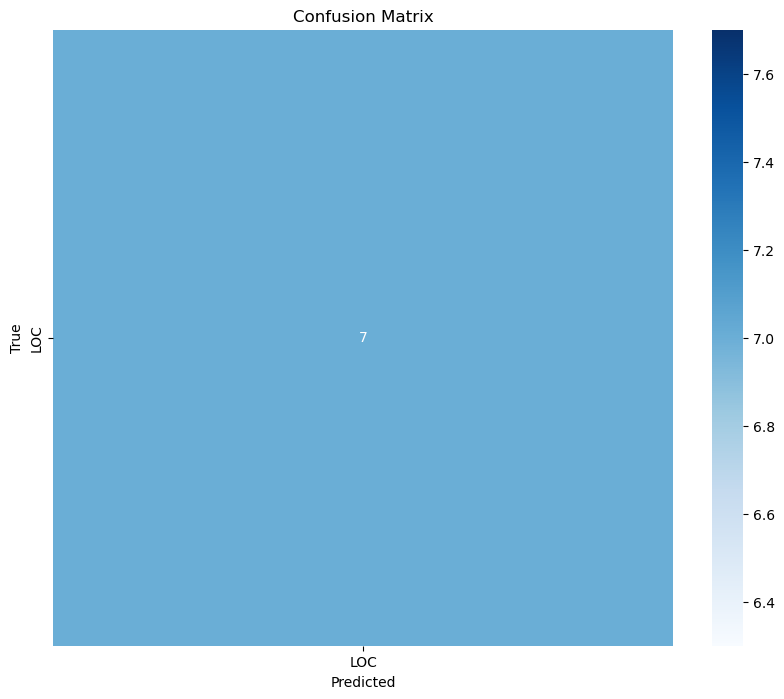

In [77]:
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



labels = sorted(list(set(y_true + y_pred)))


conf_matrix = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

This Evaluation Technique does not work for when there is a very limited number of data and they all have the same  label.
Tokens are different, but tags are the same, resulting in perfect prediction.... 

This technique might work for data where "Nulls" or untagged tokens labeled as 'O' are preserved in the data set...
